# OpenCV & Tesseract Tutorials

[OpenCV를 활용한 명함인식 기능 구현 강좌](https://www.inflearn.com/course/opencv-%EA%B0%95%EC%A2%8C-%EB%AA%85%ED%95%A8%EC%9D%B8%EC%8B%9D/)를 듣고 정리한 내용입니다.

### 0. OpenCV 및 Tesseract-ocr 모듈 설치 유무 확인

In [1]:
# OpenCV 및 OCR모듈 설치 유무 확인

import sys
import cv2
import pytesseract
from PIL import Image

# 윈도우에서 주석해제 (tesseract_path: tesseract설치경로 확인 후 붙여넣기)
# tesseract_path = 'C:/Program Files (x86)/Tesseract-OCR'
# pytesseract.pytesseract.tesseract_cmd = tesseract_path + '/tesseract'

print ("python:", sys.version)
print ("opencv:", cv2.__version__)
print ("pytesseract:", pytesseract.image_to_string(Image.open('images/test.png')))

python: 3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 18:11:28) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
opencv: 3.4.0
pytesseract: pytesseract version 0.1.6


### 1. 이미지 읽기, 쓰기 및 표시하기

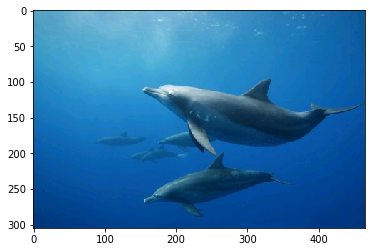

In [2]:
# OpenCV - 이미지 읽기, 쓰기 및 표시하기 (1)

%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

def handle_image():
    imgfile = './images/sample.png'
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    

handle_image()

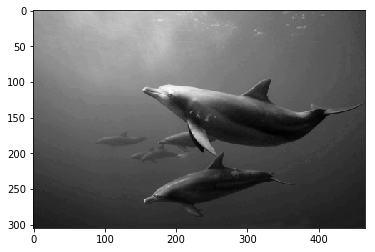

In [3]:
# OpenCV - 이미지 읽기, 쓰기 및 표시하기 (2)

def handle_image():
    imgfile = 'images/sample.png'
    img = cv2.imread(imgfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img, cmap='Greys_r')
    cv2.imwrite('images/grayImage.png', img)


handle_image()

### 2. 도형 외곽 추출하기

- `cv2.Canny()` : http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

- `cv2.findContours()` : http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html?highlight=findcontours

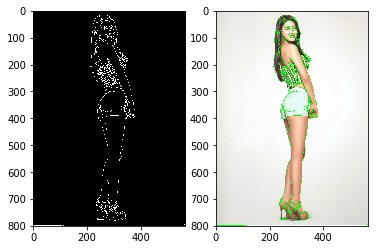

In [4]:
# OpenCV - 도형 외곽 추출하기 (1)

def contour():
    imgfile = 'images/contour.jpg'
    img = cv2.imread(imgfile)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 색공간 변화 RGB -> GRAY
    
    edge = cv2.Canny(imgray, 100, 200)  # edge detection (Canny)
    edge, contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(edge, cmap='Greys_r')
    axs[1].imshow(img)
    
    
contour()

- `cv2.approxPolyDP()` : https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

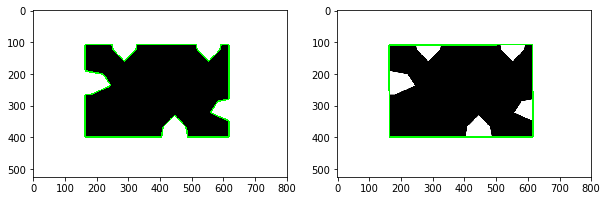

In [5]:
# OpenCV - 도형 외곽 추출하기 (2)

def contour_approx():
    imgfile = 'images/contour2.png'
    img = cv2.imread(imgfile)
    img2 = img.copy()
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    edge = cv2.Canny(imgray, 100, 200)
    edge, contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cnt = contours[0]
    cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
    
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    
    approx = cv2. approxPolyDP(cnt, epsilon, True)
    
    cv2.drawContours(img2, [approx], 0, (0, 255, 0), 3)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[1].imshow(img2)
    
    
contour_approx()

### 3. 투영변환 구현하기
- `cv2.getAffineTransform()` : http://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html?highlight=getAffine#affine-transformation

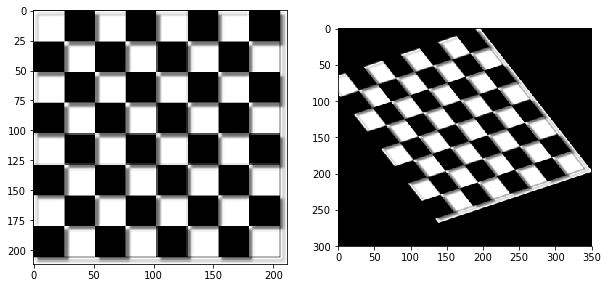

In [6]:
# OpenCV - 투영변환 구현하기 (1)

def warp_affine():
    img = cv2.imread('./images/transform.png')
    
    pts1 = np.float32([[50, 50], [200, 50], [20, 200]])
    pts2 = np.float32([[70, 100], [220, 50], [150, 250]])
    
    M = cv2.getAffineTransform(pts1, pts2)  # pts1 -> pts2
    
    result = cv2.warpAffine(img, M, (350, 300))
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[1].imshow(result)
    

warp_affine()

- `cv2.getPerspectiveTransform()` : http://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html?highlight=getAffine#perspective-transformation

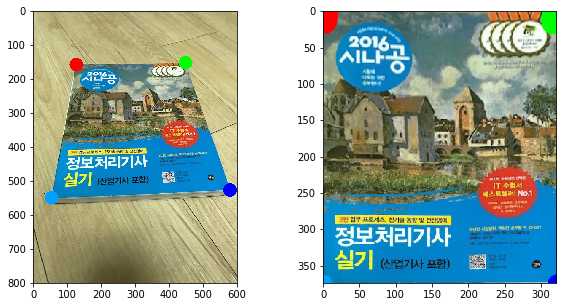

In [7]:
# OpenCV - 투영변환 구현하기 (2)

def warp_perspective():
    img = cv2.imread('./images/transform.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    topLeft = [127, 157]
    topRight = [448, 152]
    bottomRight = [579, 526]
    bottomLeft = [54, 549]
    
    pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])
    
    w1 = abs(bottomRight[0] - bottomLeft[0])
    w2 = abs(topRight[0] - topLeft[0])
    h1 = abs(topRight[1] - bottomRight[1])
    h2 = abs(topLeft[1] - bottomLeft[1])
    minWidth = min([w1, w2])
    minHeight = min([h1, h2])
    
    # image에 좌표점 표시하기
    cv2.circle(img, (127, 157), 20, (255, 0, 0), -1)
    cv2.circle(img, (448, 152), 20, (0, 255, 0), -1)
    cv2.circle(img, (579, 526), 20, (0, 0, 255), -1)
    cv2.circle(img, (54, 549), 20, (0, 160, 255), -1)
    
    pts2 = np.float32([[0, 0], [minWidth-1, 0], 
                       [minWidth-1, minHeight-1], [0, minHeight-1]])
    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(img, M, (int(minWidth), int(minHeight)))
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[1].imshow(result)
    
    
warp_perspective()

### 4. 스캔한듯 효과주기

- `cv2.threshold()` : http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold#image-thresholding

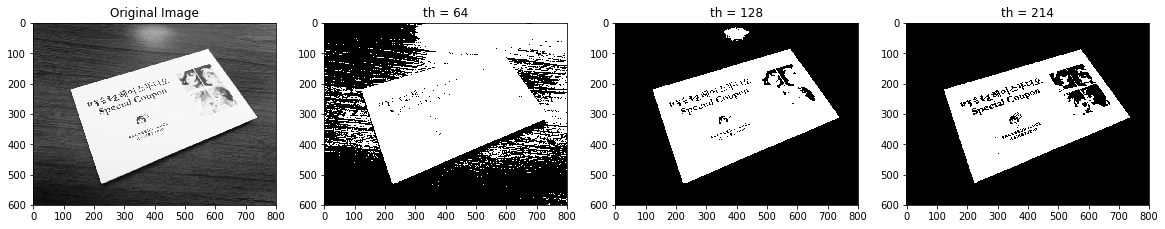

In [38]:
# OpenCV - 스캔한듯 한 효과주기 (1)

def global_threshold():
    imgfile = 'images/document.jpg'
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    # Resize image
    r = 600.0 / img.shape[0]
    dim = (int(img.shape[1] * r), 600)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    
    ret,th1 = cv2.threshold(img, 64, 255,cv2.THRESH_BINARY)
    ret,th2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    ret,th3 = cv2.threshold(img, 214, 255, cv2.THRESH_BINARY)

    titles = ['Original Image', 'th = 64',
                'th = 128', 'th = 214']
    images = [img, th1, th2, th3]

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, img in enumerate(images):
        axs[i].imshow(img, cmap='Greys_r')
        axs[i].set_title(titles[i])
    
    
global_threshold()

- `cv2.adaptiveThreshold()` : http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold#adaptive-thresholding

- `cv2.GaussianBlur()` : http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html?highlight=gaussianblur#gaussian-filtering

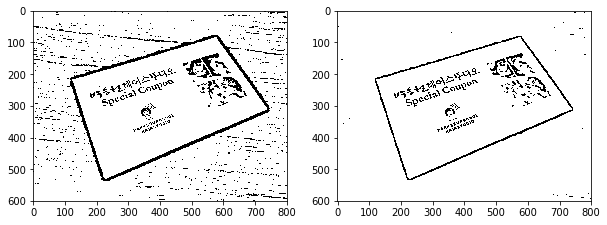

In [46]:
# OpenCV - 스캔한듯 한 효과주기 (2)

def adaptive_threshold():
    imgfile = 'images/document.jpg'
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    # Resize image
    r = 600.0 / img.shape[0]
    dim = (int(img.shape[1] * r), 600)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # Blur image and apply adaptive threshold
    blur = cv2.GaussianBlur(img, (5, 5), 0)  # smoothing
    result_without_blur = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
    result_with_blur = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(result_without_blur, cmap='Greys_r')
    axs[1].imshow(result_with_blur, cmap='Greys_r')
    
    
adaptive_threshold()